# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

import xarray as xr
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

from utils.utils import reduceDataByDay
from camels_spat2nh import *

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Set to None for unlimited columns or specify a number
# Now, when one displays xarray DataArrays or Datasets, the columns will be wider


# Get the current working directory of the notebook
CURRENT_DIR = os.getcwd()
# Add the parent directory of the notebook to the Python path
# root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
ROOT_DIR = os.path.abspath(CURRENT_DIR)
sys.path.append(ROOT_DIR)



In [2]:
# Print packages version
print(f'xarray version: {xr.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'yaml version: {yaml.__version__}')


xarray version: 2023.1.0
pandas version: 2.0.3
numpy version: 1.24.4
yaml version: 6.0.1


# Load Data

## Util data

In [3]:
data_dir, data_gen = load_util_data(CURRENT_DIR)

## Explore time-frame for usable basins

In [4]:
basins_dir = data_dir['data_dir_camels_spat_nh']
countries = data_gen['countries']

In [5]:
for country in countries:
    print(f'Country: {country}')
    country_dir = os.path.join(basins_dir, f'CAMELS_spat_{country}')
    print(f'Country directory: {country_dir}', len(os.listdir(country_dir)))


Country: CAN
Country directory: ../../../gladwell/hydrology/SUMMA/summa-ml-models/CAMELS_spat_NH/CAMELS_spat_CAN 764
Country: USA
Country directory: ../../../gladwell/hydrology/SUMMA/summa-ml-models/CAMELS_spat_NH/CAMELS_spat_USA 662


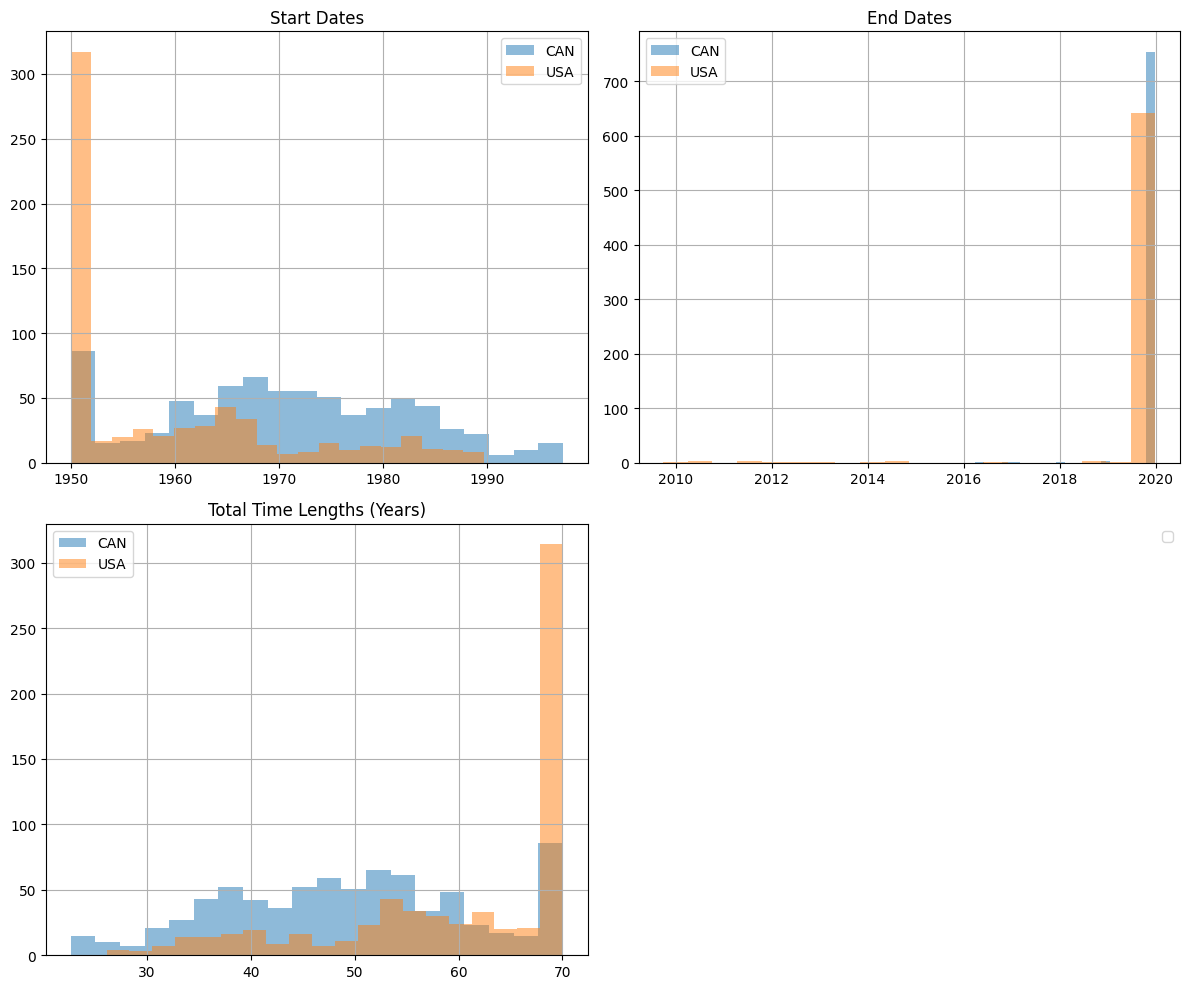

In [6]:
# Function to calculate statistics for time frames
def calculate_time_stats(country_dir):
    files = os.listdir(country_dir)
    start_dates = []
    end_dates = []
    total_time_lengths = []
    for file in files:
        df = pd.read_csv(os.path.join(country_dir, file))
        df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
        start_dates.append(df['date'].min())
        end_dates.append(df['date'].max())
        total_time_lengths.append((df['date'].max() - df['date'].min()).days / 365)  # Calculate total length in years
    return start_dates, end_dates, total_time_lengths

# Dictionary to store results
time_stats = {}

# Iterate over countries
for country in countries:
    country_dir = os.path.join(basins_dir, f'CAMELS_spat_{country}')
    start_dates, end_dates, total_time_lengths = calculate_time_stats(country_dir)
    time_stats[country] = {'Start Dates': start_dates, 'End Dates': end_dates, 'Total Time Lengths (Years)': total_time_lengths}

# Plot histograms for start dates, end dates, and total time lengths
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, country in enumerate(countries):
    axs[0, 0].hist(time_stats[country]['Start Dates'], bins=20, alpha=0.5, label=country)
    axs[0, 0].set_title('Start Dates')
    axs[0, 1].hist(time_stats[country]['End Dates'], bins=20, alpha=0.5, label=country)
    axs[0, 1].set_title('End Dates')
    axs[1, 0].hist(time_stats[country]['Total Time Lengths (Years)'], bins=20, alpha=0.5, label=country)
    axs[1, 0].set_title('Total Time Lengths (Years)')

# Hide the empty subplot
axs[1, 1].axis('off')

# Add legend and adjust layout
for ax in axs.flat:
    ax.legend(countries)
    ax.grid(True)

plt.tight_layout()
plt.show()

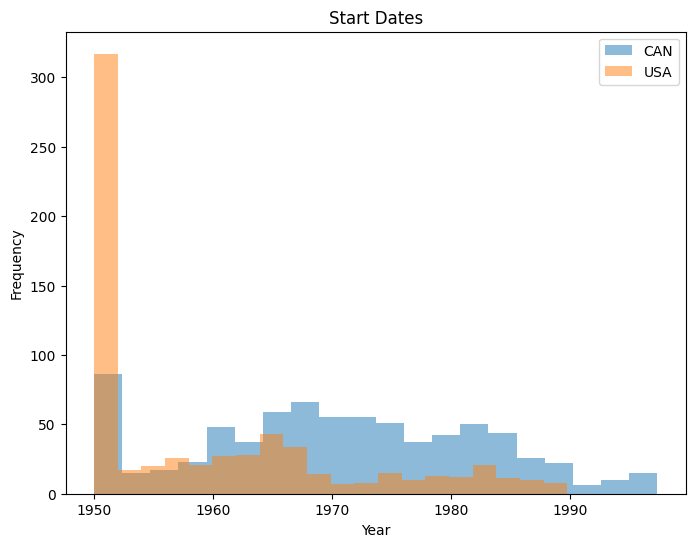

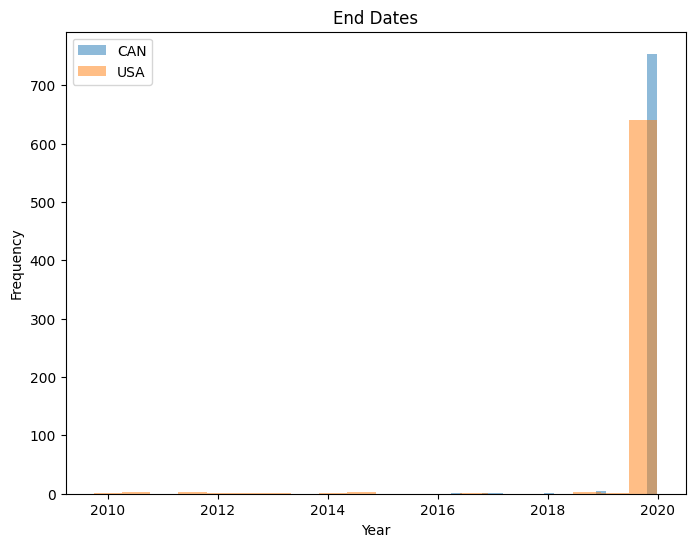

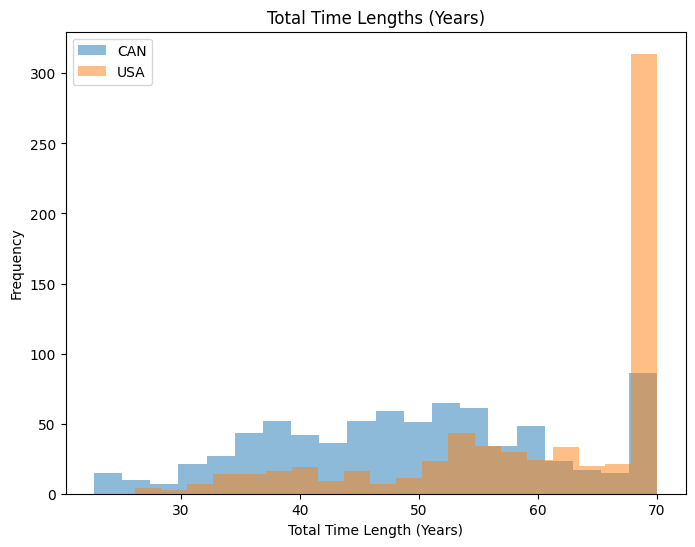

In [7]:
# Function to calculate statistics for time frames
def calculate_time_stats(country_dir):
    files = os.listdir(country_dir)
    start_dates = []
    end_dates = []
    total_time_lengths = []
    for file in files:
        df = pd.read_csv(os.path.join(country_dir, file))
        df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
        start_dates.append(df['date'].min())
        end_dates.append(df['date'].max())
        total_time_lengths.append((df['date'].max() - df['date'].min()).days / 365)  # Calculate total length in years
    return start_dates, end_dates, total_time_lengths

# Function to plot histograms for start dates, end dates, and total time lengths
def plot_time_statistics(time_data, labels, title, xlabel):
    plt.figure(figsize=(8, 6))
    for i, data in enumerate(time_data):
        plt.hist(data, bins=20, alpha=0.5, label=labels[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    # plt.grid(True)
    plt.show()

# Dictionary to store results
time_stats = {}

# Iterate over countries
for country in countries:
    country_dir = os.path.join(basins_dir, f'CAMELS_spat_{country}')
    start_dates, end_dates, total_time_lengths = calculate_time_stats(country_dir)
    time_stats[country] = {'Start Dates': start_dates, 'End Dates': end_dates, 'Total Time Lengths (Years)': total_time_lengths}

# Extract data for plotting
start_dates_data = [time_stats[country]['Start Dates'] for country in countries]
end_dates_data = [time_stats[country]['End Dates'] for country in countries]
total_time_lengths_data = [time_stats[country]['Total Time Lengths (Years)'] for country in countries]

# Plot histograms for start dates
plot_time_statistics(start_dates_data, countries, 'Start Dates', 'Year')

# Plot histograms for end dates
plot_time_statistics(end_dates_data, countries, 'End Dates', 'Year')

# Plot histograms for total time lengths (in years)
plot_time_statistics(total_time_lengths_data, countries, 'Total Time Lengths (Years)', 'Total Time Length (Years)')


## Process xarrays to csv

In [ ]:
# ## Let's profile the loop
# start_time = time.time()
# camels_spat2nh(data_dir, data_gen)
# ## End of process
# print('\n', f"--- {(time.time() - start_time):.2f} seconds ---")

## Tests

In [ ]:
# Define the path to the data directory file
data_dir_path = os.path.join(root_dir, "utils", "data_dir.yml")

with open(data_dir_path, 'r') as ymlfile:
    data_dir = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
data_dir_src = data_dir['data_dir_camels_spat']
data_dir_out = data_dir['data_dir_camels_spat_nh']

In [ ]:
data_gen_path = os.path.join(root_dir, "utils", "data_general.yml")

with open(data_gen_path, 'r') as ymlfile:
    data_gen = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
countries = data_gen['countries']
camels_spat_metadata = data_gen['camels_spat_metadata']
camels_spat_unusable = data_gen['camels_spat_unusable']
data_sources = data_gen['data_sources']

### Filter usable basins and create txt file

In [ ]:
# df_metadata = pd.read_csv(os.path.join(data_dir_src, camels_spat_metadata))
# df_unusable = pd.read_csv(os.path.join(data_dir_src, camels_spat_unusable))
df_metadata = pd.read_csv(os.path.join('data', camels_spat_metadata))
# df_unusable = pd.read_csv(os.path.join('data', camels_spat_unusable))

# # Create a dict to map the Country to a list of Station_id
# # Create a dictionary to map Country to a list of Station_id
# country_station_map = {}
# for index, row in df_metadata.iterrows():
#     country = row['Country']
#     station_id = row['Station_id']
#     if country in country_station_map:
#         country_station_map[country].append(station_id)
#     else:
#         country_station_map[country] = [station_id]

## Basin data

In [ ]:
file_name = 'camels_spat_metadata.csv'
# file_name = 'rhbn_stations.csv'
# Load data as pandas dataframe
df = pd.read_csv(os.path.join(data_dir_src, file_name), sep=',', header=0)
# Print first 5 rows
len(df)

1698

In [ ]:
basin_data_path = os.path.join(data_dir_src, 'basin_data')
list_basin_files = sorted(os.listdir(basin_data_path))

# Filter folders by country name (3 first letters) - create a dictionary
basin_data_path_dict = {}
for country in countries:
    basin_data_path_dict[country] = [basin for basin in list_basin_files if basin[:3] == country]
len(basin_data_path_dict['CAN']) + len(basin_data_path_dict['USA'])

4

In [ ]:
basin_data_path_dict[countries[0]]

['CAN_01AD002', 'CAN_01AD003']

In [ ]:
relative_path_forc = data_dir['relative_path_forcing']
relative_path_targ = data_dir['relative_path_target']
for country in countries[1:]:
    
    # Create a folder for each country
    country_dir = os.path.join(data_dir_out, f'CAMELS_spat_{country}')
    if not os.path.exists(country_dir ):
        os.makedirs(country_dir)
    else:
        print(f"Directory {country_dir} already exists")
        
    print(country)
    for basin_f in basin_data_path_dict[country][:]:
        print(basin_f)
        ## Load input data
        df_src_dict = {}
        for src in data_sources:
            folder2load = os.path.join(basin_data_path, basin_f, relative_path_forc)
            
            eras_files = sorted([f for f in os.listdir(folder2load) if src in f])
            print(src, len(eras_files))

            # Initialize an empty list to store the xarray datasets
            datasets = []
            # Iterate over the files and load each dataset
            print("Loading Input datasets...")
            for file2load in eras_files[:50]:
                # If not .temp file
                if '.tmp' not in file2load:
                    basin_data = xr.open_dataset(os.path.join(folder2load, file2load))
                    datasets.append(basin_data)
                
            # Concatenate all datasets along the 'time' dimension
            print("Concatenating Input datasets...")
            concatenated_dataset = xr.concat(datasets, dim='time')
                
            # Reduce basin_data to daily values
            print("Reducing Input data to daily values...")
            basin_data_reduced = reduceDataByDay(concatenated_dataset, data_gen['input_vars'], data_gen['sum_vars'])
            # Convert the reduced basin_data to a DataFrame, dropping the 'hru' dimension
            print("Converting Input to DataFrame...")
            basin_data_df = basin_data_reduced.to_dataframe().droplevel('hru').reset_index()
            
            # Save to dict
            df_src_dict[src] = basin_data_df
            
        # Merge dataframes in the dictionary
        print("Merging Input DataFrames...")
        df_merged_inp = df_src_dict[data_sources[0]].merge(df_src_dict[data_sources[1]], on='time')
        
        # Rename time by date
        df_merged_inp.rename(columns={'time': 'date'}, inplace=True)
        
        ## Load target data
        target_data = xr.open_dataset(os.path.join(basin_data_path, basin_f, relative_path_targ, f'{basin_f}_daily_flow_observations.nc'))
        
        # Subset by data_gen['target_vars']
        target_data = target_data[data_gen['target_vars']]
        # Convert to DataFrame
        print("Converting Target to DataFrame...")
        df_target = target_data.to_dataframe().reset_index()
        # Rename time by date
        df_target.rename(columns={'time': 'date'}, inplace=True)
        # # drop column 'time_bnds' and remove duplicates
        # df_target.drop(columns=['time_bnds'], inplace=True)
        df_target = df_target.drop_duplicates(subset=['date'])
        
        # Merge input and target dataframes
        print("Merging Input and Target DataFrames...")
        df_merged = df_merged_inp.merge(df_target, on='date')
        
        # Save to file
        print("Saving to file...")
        df_merged.to_csv(os.path.join(country_dir, basin_f + '.csv'), index=False)
        
        

Directory ../../../gladwell/hydrology/SUMMA/summa-ml-models/CAMELS_spat_NH/CAMELS_spat_USA already exists
USA
USA_01013500
ERA5 877
Loading Input datasets...


Concatenating Input datasets...
Reducing Input data to daily values...
Converting Input to DataFrame...
EM-Earth 840
Loading Input datasets...
Concatenating Input datasets...
Reducing Input data to daily values...
Converting Input to DataFrame...
Merging Input DataFrames...
Converting Target to DataFrame...
Merging Input and Target DataFrames...
Saving to file...
USA_01022500
ERA5 877
Loading Input datasets...
Concatenating Input datasets...
Reducing Input data to daily values...
Converting Input to DataFrame...
EM-Earth 840
Loading Input datasets...
Concatenating Input datasets...
Reducing Input data to daily values...
Converting Input to DataFrame...
Merging Input DataFrames...
Converting Target to DataFrame...
Merging Input and Target DataFrames...
Saving to file...


In [ ]:
df_merged.columns

Index(['date', 'e', 'mper', 'msdwlwrf', 'msdwswrf', 'msnlwrf', 'msnswrf',
       'mtpr', 'q', 'rh', 'sp', 't', 'u', 'v', 'w', 'phi', 'tmean', 'prcp',
       'q_obs'],
      dtype='object')

In [ ]:
list(basin_data.data_vars)

['latitude', 'longitude', 'hruId', 'tmean', 'prcp', 'time_bnds']

In [ ]:
folder2load = os.path.join(basin_data_path, basin_data_path_dict[countries[0]][0], 'observations')
file2load = basin_data_path_dict[countries[0]][0] + '_daily_flow_observations.nc'
basin_obs = xr.open_dataset(os.path.join(folder2load, file2load))
basin_obs

<xarray.Dataset>
Dimensions:                   (time: 25933, nbnds: 2)
Coordinates:
  * time                      (time) datetime64[ns] 1950-01-01 ... 2020-12-31
  * nbnds                     (nbnds) int32 1 2
Data variables:
    q_obs_data_quality        (time) object ...
    q_obs                     (time) float64 ...
    q_obs_is_ice_affected     (time) int32 ...
    q_obs_is_partial_day      (time) int32 ...
    q_obs_is_dry_day          (time) int32 ...
    q_obs_is_estimated_value  (time) int32 ...
    time_bnds                 (nbnds, time) datetime64[ns] ...
Attributes:
    title:        CAMELS-spat streamflow data
    conventions:  CF-1.10
    source:       Streamflow derived from observed water levels
    country:      CAN
    station:      01AD002
    institution:  Water Survey of Canada
    references:   Original data extracted from the Environment and Climate Ch...
    history:      2023-08-02 11:32:55 | File prepared using CAMELS-spat scrip...
    comment:      Water Survey of Canada calculates daily average flow values...

In [ ]:
variable_names = [var for var in list(basin_obs.variables.keys()) if 'obs' in var]
variable_names

['q_obs_data_quality',
 'q_obs',
 'q_obs_is_ice_affected',
 'q_obs_is_partial_day',
 'q_obs_is_dry_day',
 'q_obs_is_estimated_value']

Text(0.5, 1.0, 'q_obs')

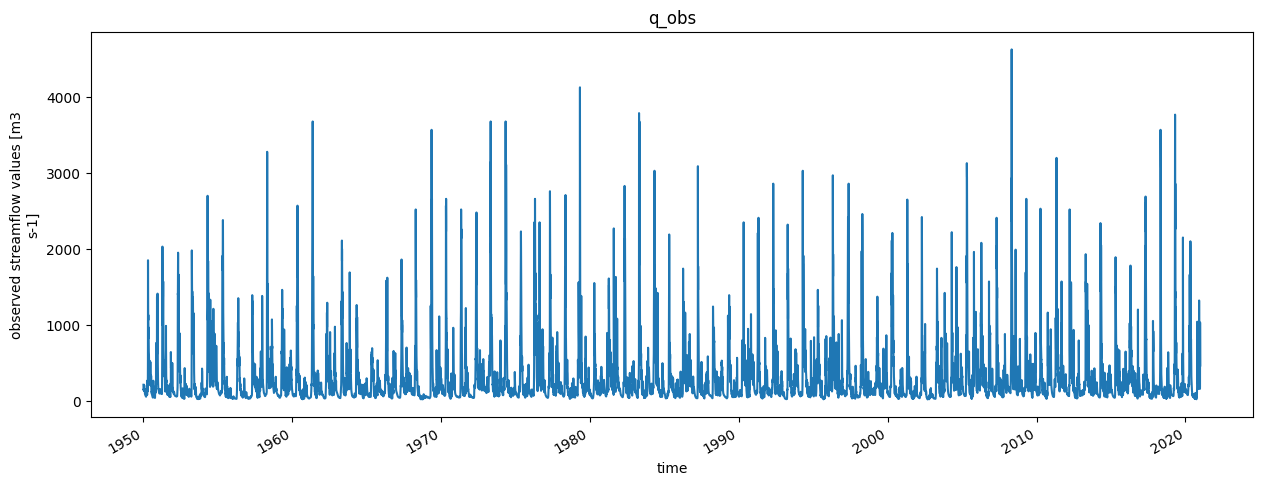

In [ ]:
var_to_plot = variable_names[1]
# Plot the data
basin_obs[var_to_plot].plot.line(hue='station_id', figsize=(15, 5))
plt.title(var_to_plot)